# DSBDA Group B A2
## Perform the following operations using Python on the Air quality and Heart Diseases data sets 
### a. Data cleaning 
### b. Data integration
### c. Data transformation 
### d. Error correcting
### e. Data model building

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 

In [4]:
df = pd.read_csv("heart_desease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Renaming (Data Cleaning)


In [24]:
df.rename(columns={'target':'target_'}, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target_,new_Column
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,NaT
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,NaT
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,NaT
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,NaT
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,NaT
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,NaT
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,NaT
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,NaT


# Adding New Column (Data Transformation)

In [32]:
df["new_Column"] = pd.NaT
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target_,new_Column,PM
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,NaT,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,NaT,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,NaT,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,NaT,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,NaT,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,NaT,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,NaT,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,NaT,0


## Replacing None Values with 0 (Error Correcting)

In [25]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
target_         0
new_Column    303
dtype: int64

In [28]:
df['new_Column'] = df['new_Column'].replace(np.nan, 0)
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target_       0
new_Column    0
PM            0
dtype: int64

## Model Building

In [31]:
from sklearn.linear_model import LinearRegression 

In [92]:
X = df['slope']
Y = df['thalach']

In [93]:
lm = LinearRegression(fit_intercept=False)

In [94]:
lm.fit(df[['slope']],df.thalach)

LinearRegression(fit_intercept=False)

<AxesSubplot:xlabel='slope'>

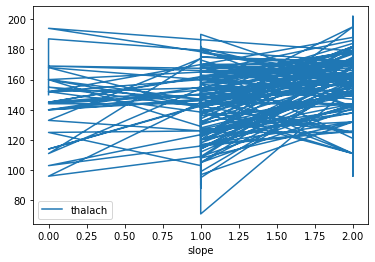

In [100]:
df.plot(kind= 'line', x='slope' , y='thalach')

In [96]:
lm.coef_

array([91.94774011])

In [97]:
lm.predict([[8]])

array([735.5819209])